# Team Project Data Mining  - MSDS 7331
### Name: Cynthia Alvarado, Christopher Havenstein, Alma Lopez, Hieu Nguyen
#### Notebook for H-1 Visa project


## Business Understanding

#### The U.S. Department of Labor's Office of Foreign Labor Certification (OLFC) is responsible for administering and approving U.S. H-1B Visa applications. The OFLC Performance data for the 2016 H-1B Visa applications, is published externally as a means of audit and to provide information for company stakeholders who sponsor H1-B Visa applicants.

#### From a company's economic standpoint, can they reasonably budget the time and money for an applicant since there is a chance that the visa could be denied, thus setting back potentially months of waiting?

#### Since companies are interested in the likelihood of their applications being approved, we will focus on the CASE_STATUS values "Certified," "Certified-Withdrawn," and Denied," where we will combine "Certified" and "Certified-Withdrawn" as Certified, and "Denied."

#### Then, we will measure how effective our predictive models, like logistic regression, are using these two values of "CASE_STATUS" with accuracy, precision, recall, and ROC curves.


## Data Meaning Type

The description of these fields below can be found at https://www.foreignlaborcert.doleta.gov/docs/Performance_Data/Disclosure/FY15-FY16/H-1B_FY16_Record_Layout.pdf


| Variable      | Description                                     | Data Type |
| ------------- |:-----------------------------------------------|-----|
| CASE_NUMBER   | Unique identifier assigned to each application submitted for processing to the Chicago National Processing Center.| object |
| CASE_STATUS   | tatus associated with the last significant event or decision. Valid values include “Certified,” “Certified-Withdrawn,” Denied,” and “Withdrawn” | object |
|  CASE_SUBMITTED | Date and time the application was submitted.  | object |
| DECISION_DATE | Date on which the last significant event or decision was recorded by the Chicago National Processing Center.|object |
| VISA_CLASS | Indicates the type of temporary application submitted for processing. R = H-1B; A = E-3 Australian; C = H-1B1 Chile; S = H-1B1 Singapore. Also referred to as “Program” in prior years.|object |
| EMPLOYMENT_START_DATE | Beginning date of employment. |object |
|EMPLOYMENT_END_DATE | Ending date of employment.|object |
|EMPLOYER_NAME | Name of employer submitting labor condition application.|object |
|EMPLOYER_ADDRESS|Employer address|object |
|EMPLOYER_CITY|Employer City|object |
|EMPLOYER_STATE|Employer State|string |
|EMPLOYER_POSTAL_CODE|Employer Postal Code|object |
|EMPLOYER_COUNTRY|Employer Country|object |
|EMPLOYER_PROVINCE|Employer Province|object |
|EMPLOYER_PHONE|Employer Phone|object |
|EMPLOYER_PHONE_EXT|Employer Phone Extension|object |
|AGENT_ATTORNEY_NAME | Name of Agent or Attorney filing an H-1B application on behalf of the employer.|object |
|AGENT_ATTORNEY_CITY | City information for the Agent or Attorney filing an H-1B application on behalf of the employer.|object |
|AGENT_ATTORNEY_STATE | State information for the Agent or Attorney filing an H-1B application on behalf of the employer.|object |
|JOB_TITLE | Title of the job.|object |
|SOC_CODE | Occupational code associated with the job being requested for temporary labor condition, as classified by the Standard Occupational Classification (SOC) System.|object |
|SOC_NAME | Occupational name associated with the SOC_CODE|object |
|NAIC_CODE | Industry code associated with the employer requesting permanent labor condition, as classified by the North American Industrial Classification System (NAICS)|int64 |
|TOTAL_WORKERS | Total number of foreign workers requested by the Employer(s).|int64 |
|FULL_TIME_POSITION | Y = Full Time Position; N = Part Time Position.|object |
|PREVAILING_WAGE | Prevailing Wage for the job being requested for temporary labor condition.|float64 |
|PW_UNIT_OF_PAY | Unit of Pay. Valid values include “Daily (DAI),” “Hourly (HR),” “Bi-weekly (BI),” “Weekly (WK),” “Monthly (MTH),” and “Yearly (YR)”.|object |
|PW_SOURCE | Variables include "OES", "CBA", "DBA", "SCA" or "Other".|object |
|PW_SOURCE_YEAR | Year the Prevailing Wage Source was Issued.|int64 |
|PW_SOURCE_OTHER | If "Other Wage Source", provide the source of wage.|object |
|WAGE_RATE_OF_PAY_FROM | Employer’s proposed wage rate. Determined by the Department of Labor.|float64 |
|WAGE_RATE_OF_PAY_TO | Maximum proposed wage rate. Determined by the Department of Labor.|float64 |
|WAGE_UNIT_OF_PAY | Unit of pay. Valid values include “Hour", "Week", "Bi-Weekly", "Month", or "Year".|object |
|H-1B_DEPENDENT | Y = Employer is H-1B Dependent; N = Employer is not H-1B Dependent.|object |
|WILLFUL_VIOLATOR | Y = Employer has been previously found to be a Willful Violator; N = Employer has not been considered a Willful Violator.|object |
|WORKSITE_CITY | City information of the foreign worker's intended area of employment.|object |
|WORKSITE_COUNTY | County information of the foreign worker's intended area of employment. |object |
|WORKSITE_STATE | State information of the foreign worker's intended area of employment.|object |
|WORKSITE_POSTAL_CODE | Zip Code information of the foreign worker's intended area of employment.|object |
|ORIGINAL_CERT_DATE | Original Certification Date for a Certified_Withdrawn application.|object |


## Data Quality

#### In this section we do exploration of the data that includes: looking for outliers, missing data.

In [38]:
#Import libraries needed to load data and initial Data Analysis
import pandas as pd
import numpy as np


In [39]:
#Load Data data set is a csv file 
filename = "C:\Alma@SMU\MSDS_7331_DM\H1Visa_Project\H-1B_Disclosure_Data_FY16.csv"
H1VisaData_df = pd.read_csv(filename, encoding='cp1252')

C:\Users\Alma_Lopez\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
#Exploration Data Analysis (EDA)
#Checking column names, values types, missing values from the data set
print (H1VisaData_df.dtypes)
print (H1VisaData_df.info())
print (H1VisaData_df.isnull().sum())

CASE_NUMBER               object
CASE_STATUS               object
CASE_SUBMITTED            object
DECISION_DATE             object
VISA_CLASS                object
EMPLOYMENT_START_DATE     object
EMPLOYMENT_END_DATE       object
EMPLOYER_NAME             object
EMPLOYER_ADDRESS          object
EMPLOYER_CITY             object
EMPLOYER_STATE            object
EMPLOYER_POSTAL_CODE      object
EMPLOYER_COUNTRY          object
EMPLOYER_PROVINCE         object
EMPLOYER_PHONE            object
EMPLOYER_PHONE_EXT        object
AGENT_ATTORNEY_NAME       object
AGENT_ATTORNEY_CITY       object
AGENT_ATTORNEY_STATE      object
JOB_TITLE                 object
SOC_CODE                  object
SOC_NAME                  object
NAIC_CODE                float64
TOTAL_WORKERS              int64
FULL_TIME_POSITION       float64
PREVAILING_WAGE           object
PW_UNIT_OF_PAY            object
PW_WAGE_SOURCE            object
PW_SOURCE_YEAR           float64
PW_SOURCE_OTHER           object
WAGE_RATE_

##### The following columns have a big number of missing data and we consider that are not useful in our analysis, it was decided to delete them:  EMPLOYER_PROVINCE, EMPLOYER_PHONE_EXT, AGENT_ATTORNEY_CITY, AGENT_ATTORNEY_STATE, FULL_TIME_POSITION (no values), ORIGINAL_CERT_DATE
##### A new dataset was created to do all the clean up process and have access to the original data set with no problem.
##### For better manipulation of data with date formats we proceed to change the column datattype from object to datetime
##### Based on our research on visa process the year 2016 starts on October-1-2015 so records before that date will  be removed

In [41]:
#Removing columns that are not needed for this analysis and has big percentage of missing values
H1VisaClean_df = H1VisaData_df
H1VisaClean_df.drop(['EMPLOYER_PROVINCE', 'EMPLOYER_PHONE_EXT', 'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE', 'FULL_TIME_POSITION', 'ORIGINAL_CERT_DATE'], axis=1, inplace=True)

In [42]:
# Transform a object type to date typefor easy data manipulation in the clean up process
H1VisaData_df['EMPLOYMENT_START_DATE'] =  pd.to_datetime(H1VisaData_df['EMPLOYMENT_START_DATE'], format='%m/%d/%Y')
H1VisaData_df['CASE_SUBMITTED'] =  pd.to_datetime(H1VisaData_df['CASE_SUBMITTED'], format='%m/%d/%Y')
H1VisaData_df['DECISION_DATE'] =  pd.to_datetime(H1VisaData_df['DECISION_DATE'], format='%m/%d/%Y') 
H1VisaData_df['EMPLOYMENT_END_DATE'] =  pd.to_datetime(H1VisaData_df['EMPLOYMENT_END_DATE'], format='%m/%d/%Y') 


In [62]:
# Removing records that are not part of 2016 where goverments starts on 10/1/2015 
H1VisaClean_df = H1VisaClean_df[(H1VisaClean_df['EMPLOYMENT_START_DATE']>('2015-10-1'))]

##### CASE_STATUS values to consider in our analysis are:
##### - "Certified" or "Certified-Withdrawn"  - Approved
##### - "Denied" - Not Approved 
##### - "Withdrawn" means the petition was withdrawn by employer before approval for that reason we decided this information is not useful because it was not processed and will be removed for the dataset.
##### A new column "CERTIFIED" will be created with the following values:
##### - 1: H1 visa was Certified/approved  
##### - 0: H1 visa was Denied

In [63]:
# CASE_STATUS cleanup and a new column was added to see the number of days between the submission date and the last event
# recorded that might be the decision date but we are not 100% sure
H1VisaClean_df = H1VisaClean_df[H1VisaClean_df.CASE_STATUS != 'WITHDRAWN']
H1VisaClean_df['CERTIFIED']= np.where(H1VisaClean_df['CASE_STATUS']=='DENIED',0,1)
H1VisaClean_df['PROCESS_DAYS']= (H1VisaData_df['DECISION_DATE'] - H1VisaData_df['CASE_SUBMITTED']).astype('timedelta64[D]')


###### For H-1 visa petition employer name is required (visa sponsor) there are few records with no data, we assume is a human mistake there are less than 5 records so we decided to remove them.
##### We had 10 missing values for end_date so based on rules in H-1 visa the maximum value that can be granted is 3 years so these values will be imputed based on start_date+3 years 
##### For the data that few values are missing or labeles as "N/A" in the original data set for pandas were considered as null so it was decided to populated with "NO DEFINED" in the correspondent imputed columns

In [45]:
# datetime needed to do datetime functions
from datetime import timedelta

#Removing records without employer name, this is mandatory data for H-1 visa process, this data might be a human mistake when
#recording the information, very few records missed this information
H1VisaClean_df = H1VisaClean_df.dropna(subset=['EMPLOYER_NAME'])

# We had 10 misisng values for end_date so based on rules in H-1 visa the maximo value that can be granted is 3 years so these
# values will be imputed based on start_date+3 years
H1VisaClean_df['IMP_EMP_END_DATE'] = H1VisaClean_df['EMPLOYMENT_END_DATE']
H1VisaClean_df['IMP_EMP_END_DATE'].fillna(H1VisaClean_df['EMPLOYMENT_START_DATE']+ timedelta(days=1095), inplace=True)

#The following code is used to populate empty values for imputed columns 
H1VisaClean_df['IMP_EMP_ADDRESS'] = H1VisaClean_df['EMPLOYER_ADDRESS']
H1VisaClean_df['IMP_EMP_ADDRESS'].fillna("NO DEFINED", inplace=True)
H1VisaClean_df['IMP_EMP_CITY'] = H1VisaClean_df['EMPLOYER_CITY']
H1VisaClean_df['IMP_EMP_CITY'].fillna("NO DEFINED", inplace=True)
H1VisaClean_df['IMP_EMP_STATE'] = H1VisaClean_df['EMPLOYER_STATE']
H1VisaClean_df['IMP_EMP_STATE'].fillna("NO DEFINED", inplace=True)
H1VisaClean_df['IMP_EMP_ZIP'] = H1VisaClean_df['EMPLOYER_POSTAL_CODE']
H1VisaClean_df['IMP_EMP_ZIP'].fillna("00000", inplace=True)
H1VisaClean_df['IMP_JOB_TITLE'] = H1VisaClean_df['JOB_TITLE']
H1VisaClean_df['IMP_JOB_TITLE'].fillna("NO DEFINED", inplace=True)
H1VisaClean_df['IMP_SOC_CODE'] = H1VisaClean_df['SOC_CODE']
H1VisaClean_df['IMP_SOC_CODE'].fillna("00000", inplace=True)
H1VisaClean_df['IMP_SOC_NAME'] = H1VisaClean_df['SOC_NAME']
H1VisaClean_df['IMP_SOC_NAME'].fillna("NO DEFINED", inplace=True)
H1VisaClean_df['IMP_NAIC_CODE'] = H1VisaClean_df['NAIC_CODE']
H1VisaClean_df['IMP_NAIC_CODE'].fillna("00000", inplace=True)
H1VisaClean_df['IMP_WORKS_CITY'] = H1VisaClean_df['WORKSITE_CITY']
H1VisaClean_df['IMP_WORKS_CITY'].fillna("NO DEFINED", inplace=True)
H1VisaClean_df['IMP_WORKS_COUNTY'] = H1VisaClean_df['WORKSITE_COUNTY']
H1VisaClean_df['IMP_WORKS_COUNTY'].fillna("NO DEFINED", inplace=True)
H1VisaClean_df['IMP_WORKS_STATE'] = H1VisaClean_df['WORKSITE_STATE']
H1VisaClean_df['IMP_WORKS_STATE'].fillna("NO DEFINED", inplace=True)
H1VisaClean_df['IMP_WORKS_ZIP'] = H1VisaClean_df['WORKSITE_POSTAL_CODE']
H1VisaClean_df['IMP_WORKS_ZIP'].fillna("00000", inplace=True)
H1VisaClean_df['IMP_PWAGE'] = H1VisaClean_df['PREVAILING_WAGE']
H1VisaClean_df['IMP_PWAGE'].fillna("00.00", inplace=True)
H1VisaClean_df['IMP_PW_OTHER'] = H1VisaClean_df['PW_SOURCE_OTHER']
H1VisaClean_df['IMP_PW_OTHER'].fillna("00.00", inplace=True)
H1VisaClean_df['IMP_W_SOURCE'] = H1VisaClean_df['PW_WAGE_SOURCE']
H1VisaClean_df['IMP_W_SOURCE'].fillna("NO DEFINED", inplace=True)
H1VisaClean_df['IMP_H1_DEPENDENT'] = H1VisaClean_df['H-1B_DEPENDENT']
H1VisaClean_df['IMP_H1_DEPENDENT'].fillna("ND", inplace=True)
H1VisaClean_df['IMP_WILLFULL_V'] = H1VisaClean_df['WILLFUL_VIOLATOR']
H1VisaClean_df['IMP_WILLFULL_V'].fillna("ND", inplace=True)
H1VisaClean_df['IMP_PW_UNIT_PAY'] = H1VisaClean_df['PW_UNIT_OF_PAY']
H1VisaClean_df['IMP_PW_UNIT_PAY'].fillna("Year", inplace=True)
H1VisaClean_df['IMP_PW_SOURCE_YEAR'] = H1VisaClean_df['PW_SOURCE_YEAR']
H1VisaClean_df['IMP_PW_SOURCE_YEAR'].fillna("2016", inplace=True)
H1VisaClean_df['IMP_WAGE_RATE_PAY_TO'] = H1VisaClean_df['WAGE_RATE_OF_PAY_TO']
H1VisaClean_df['IMP_WAGE_RATE_PAY_TO'].fillna('WAGE_RATE_OF_PAY_FROM', inplace=True)
H1VisaClean_df['IMP_WAGE_UNIT_PAY'] = H1VisaClean_df['WAGE_UNIT_OF_PAY']
H1VisaClean_df['IMP_WAGE_UNIT_PAY'].fillna("Year", inplace=True)

#Drop original columns from our clean dataframe (H1VisaClean_df) 
H1VisaClean_df.drop(['EMPLOYMENT_END_DATE', 'EMPLOYER_ADDRESS', 'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE', \
                     'JOB_TITLE', 'SOC_CODE', 'SOC_NAME', 'NAIC_CODE','WORKSITE_CITY', 'WORKSITE_COUNTY', \
                    'WORKSITE_STATE', 'WORKSITE_POSTAL_CODE','PREVAILING_WAGE','PW_SOURCE_OTHER','PW_WAGE_SOURCE',\
                    'H-1B_DEPENDENT', 'WILLFUL_VIOLATOR','PW_UNIT_OF_PAY','PW_SOURCE_YEAR','WAGE_RATE_OF_PAY_TO', \
                    'WAGE_UNIT_OF_PAY'], axis=1, inplace=True)

# Convert object column IMP_PWAGE to float for easy manipulation of wages data 
H1VisaClean_df['IMP_PWAGE'] = H1VisaClean_df['IMP_PWAGE'].str.replace(',', '')
H1VisaClean_df['IMP_PWAGE'] = H1VisaClean_df['IMP_PWAGE'].astype(float)

#Verifying null values in H1VisaClean_df
H1VisaClean_df.isnull().sum()

CASE_NUMBER              0
CASE_STATUS              0
CASE_SUBMITTED           0
DECISION_DATE            0
VISA_CLASS               0
EMPLOYMENT_START_DATE    0
EMPLOYER_NAME            0
EMPLOYER_COUNTRY         0
EMPLOYER_PHONE           0
AGENT_ATTORNEY_NAME      0
TOTAL_WORKERS            0
WAGE_RATE_OF_PAY_FROM    0
CERTIFIED                0
PROCESS_DAYS             0
IMP_EMP_END_DATE         0
IMP_EMP_ADDRESS          0
IMP_EMP_CITY             0
IMP_EMP_STATE            0
IMP_EMP_ZIP              0
IMP_JOB_TITLE            0
IMP_SOC_CODE             0
IMP_SOC_NAME             0
IMP_NAIC_CODE            0
IMP_WORKS_CITY           0
IMP_WORKS_COUNTY         0
IMP_WORKS_STATE          0
IMP_WORKS_ZIP            0
IMP_PWAGE                0
IMP_PW_OTHER             0
IMP_W_SOURCE             0
IMP_H1_DEPENDENT         0
IMP_WILLFULL_V           0
IMP_PW_UNIT_PAY          0
IMP_PW_SOURCE_YEAR       0
IMP_WAGE_RATE_PAY_TO     0
IMP_WAGE_UNIT_PAY        0
dtype: int64

In [65]:
#Create a new subset that group the information by CASE_STATUS 
VisaStatus_df = H1VisaClean_df.groupby(['CASE_STATUS']).size().reset_index(name='counts')
print(VisaStatus_df)

           CASE_STATUS  counts
0            CERTIFIED  567646
1  CERTIFIED-WITHDRAWN   22616
2               DENIED    9184


In [66]:
#Create a new subset that group the information by VISA_CLASS and CASE_STATUS 
VisaTotals_df = H1VisaClean_df.groupby(['VISA_CLASS', 'CASE_STATUS']).size().reset_index(name='counts')
print(VisaTotals_df)

         VISA_CLASS          CASE_STATUS  counts
0    E-3 Australian            CERTIFIED    9904
1    E-3 Australian  CERTIFIED-WITHDRAWN     312
2    E-3 Australian               DENIED     900
3              H-1B            CERTIFIED  556047
4              H-1B  CERTIFIED-WITHDRAWN   22260
5              H-1B               DENIED    8168
6       H-1B1 Chile            CERTIFIED     742
7       H-1B1 Chile  CERTIFIED-WITHDRAWN      23
8       H-1B1 Chile               DENIED      67
9   H-1B1 Singapore            CERTIFIED     953
10  H-1B1 Singapore  CERTIFIED-WITHDRAWN      21
11  H-1B1 Singapore               DENIED      49


## Simple Statistics

In [67]:
#After the cleanup we have a dataset with 599,446 records with the next statistics
H1VisaClean_df.describe()

,TOTAL_WORKERS,CERTIFIED,PROCESS_DAYS,IMP_PWAGE
count,599446.000000,599446.000000,599446.000000,5.994460e+05
mean,2.042731,0.984679,9.044099,7.002879e+04
std,5.488487,0.122826,22.839785,3.115681e+04
min,1.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,1.000000,6.000000,5.568200e+04
50%,1.000000,1.000000,6.000000,6.712200e+04
75%,1.000000,1.000000,6.000000,8.432100e+04
max,169.000000,1.000000,506.000000,4.316000e+06


In [68]:
# Percentage of certified petitions
len(H1VisaClean_df[H1VisaClean_df.CERTIFIED==1])/len(H1VisaClean_df)*100.0

98.4679187116104

In [70]:
# Lets aggregate by visa_class and count certified rates
H1Visa_df_grouped = H1VisaClean_df.groupby(by='VISA_CLASS')
print (H1Visa_df_grouped.CERTIFIED.sum())
print ('---------------------------------------')
print (H1Visa_df_grouped.CERTIFIED.count())
print ('---------------------------------------')
print (H1Visa_df_grouped.CERTIFIED.sum() / H1Visa_df_grouped.CERTIFIED.count())

VISA_CLASS
E-3 Australian      10216
H-1B               578307
H-1B1 Chile           765
H-1B1 Singapore       974
Name: CERTIFIED, dtype: int32
---------------------------------------
VISA_CLASS
E-3 Australian      11116
H-1B               586475
H-1B1 Chile           832
H-1B1 Singapore      1023
Name: CERTIFIED, dtype: int64
---------------------------------------
VISA_CLASS
E-3 Australian     0.919036
H-1B               0.986073
H-1B1 Chile        0.919471
H-1B1 Singapore    0.952102
Name: CERTIFIED, dtype: float64


In [71]:
#Initial Statistics for the information groupby VISA_CLASS
print(H1Visa_df_grouped.describe())

                           CERTIFIED     IMP_PWAGE   PROCESS_DAYS  \
VISA_CLASS                                                          
E-3 Australian  count   11116.000000  1.111600e+04   11116.000000   
                mean        0.919036  8.323558e+04       8.006477   
                std         0.272793  4.910710e+04      21.126178   
                min         0.000000  0.000000e+00       1.000000   
                25%         1.000000  5.386150e+04       6.000000   
                50%         1.000000  7.889400e+04       6.000000   
                75%         1.000000  1.107395e+05       6.000000   
                max         1.000000  7.887400e+05     463.000000   
H-1B            count  586475.000000  5.864750e+05  586475.000000   
                mean        0.986073  6.977339e+04       9.067014   
                std         0.117189  3.012163e+04      22.870168   
                min         0.000000  0.000000e+00       0.000000   
                25%         1.0000

In [72]:
# Lets aggregate by WORKSITE_STATE and count certified rates
H1VisaState_df_grouped = H1VisaClean_df.groupby(by='IMP_WORKS_STATE')
print (H1VisaState_df_grouped.CERTIFIED.sum())
print ('---------------------------------------')
print (H1VisaState_df_grouped.CERTIFIED.count())
print ('---------------------------------------')
print (H1VisaState_df_grouped.CERTIFIED.sum() / H1VisaState_df_grouped.CERTIFIED.count())

IMP_WORKS_STATE
AK               166
AL              1846
AR              3123
AZ              9019
CA            108269
CO              5744
CT              9331
DC              3680
DE              3223
FL             19184
FM                 0
GA             22820
GU               290
HI               453
IA              2572
ID               789
IL             32437
IN              5590
KS              2520
KY              2399
LA              1945
MA             22492
MD              9728
ME               640
MH                 4
MI             19285
MN              9191
MO              7174
MP               122
MS               732
MT               168
NC             17285
ND               468
NE              1848
NH              1740
NJ             44423
NM               948
NO DEFINED         0
NV              1209
NY             53239
OH             15113
OK              1823
OR              4302
PA             21654
PR               166
PW                 2
RI              22

In [73]:
# Initial Statistics by State
print(H1VisaState_df_grouped.describe())

                         CERTIFIED      IMP_PWAGE  PROCESS_DAYS  TOTAL_WORKERS
IMP_WORKS_STATE                                                               
AK              count   181.000000     181.000000    181.000000     181.000000
                mean      0.917127   49128.815193     10.767956       2.022099
                std       0.276455   43752.709959     26.348335       4.311426
                min       0.000000       0.000000      1.000000       1.000000
                25%       1.000000      35.810000      6.000000       1.000000
                50%       1.000000   55674.000000      6.000000       1.000000
                75%       1.000000   74339.000000      6.000000       1.000000
                max       1.000000  187200.000000    231.000000      30.000000
AL              count  1887.000000    1887.000000   1887.000000    1887.000000
                mean      0.978272   60475.939385     10.841547       1.366190
                std       0.145831   33548.420546   

## Visualize Attributes

Work Site, Work State
VISA Class
Total Workers
Full_Time_Position
AGENT_ATTORNEY_CITY
AGENT_ATTORNEY_STATE
SOC_NAME
WILLFUL_VIOLATOR
WAGE_RATEOF_PAY_FROM
WAGE_RATE_OF_PAY_TO

In [74]:
# Visualization in Python with Pandas, Matplotlib
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#for Color Cycling in visualizations
from itertools import cycle, islice

# this python magics will allow plot to be embedded into the notebook
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline



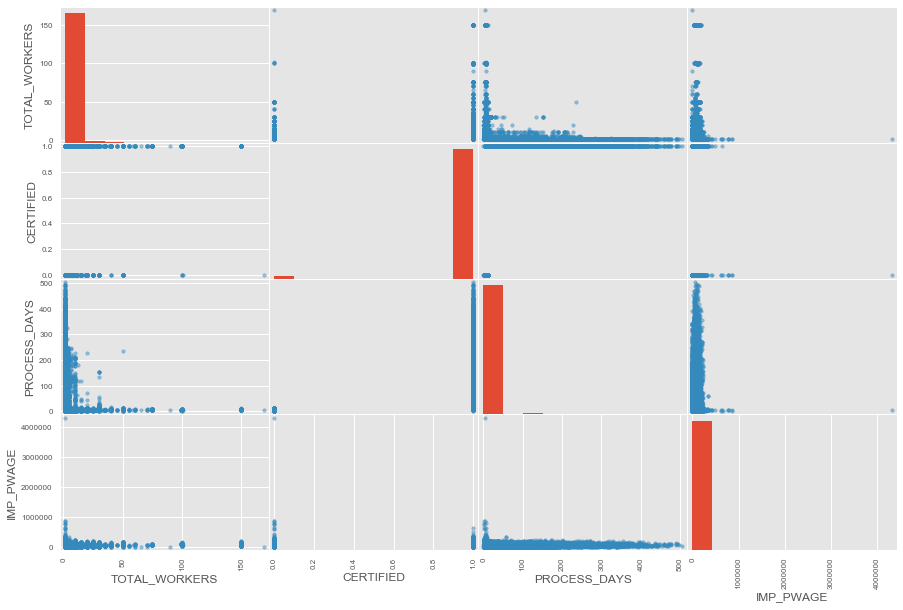

In [75]:
# Scatter-Matrix plot for the clean data set 
from pandas.tools.plotting import scatter_matrix
ax = scatter_matrix(H1VisaClean_df,figsize=(15, 10))

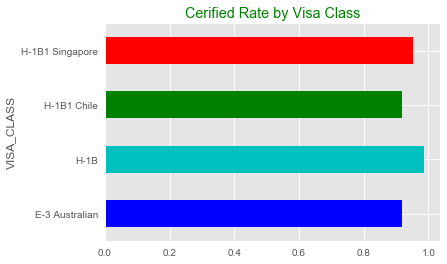

In [76]:
# Plotting grouped information for Certified petitions by VISA_CLASS 
plt.style.use('ggplot')
certified_rate = (H1Visa_df_grouped.CERTIFIED.sum() / H1Visa_df_grouped.CERTIFIED.count())

colors = list(islice(cycle(['b','c','g','r']), None, len(certified_rate)))

ax = certified_rate.plot(kind='barh', color=colors)
ax.set_title('Cerified Rate by Visa Class', color='G')

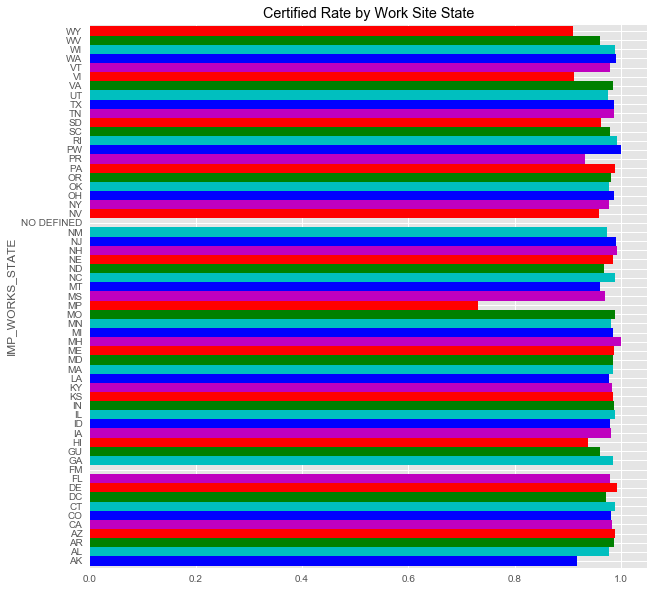

In [77]:
#for Color Cycling in visualizations
from itertools import cycle, islice

# Plotting grouped information for Certified petitions by Work Site State 
plt.style.use('ggplot')

cert_state_rate = H1VisaState_df_grouped.CERTIFIED.sum() / H1VisaState_df_grouped.CERTIFIED.count()

colors = list(islice(cycle(['b','c','g','r','m']), None, len(cert_state_rate)))

ax = cert_state_rate.plot(kind='barh', color=colors, figsize=(10,10),width=1)
ax.set_title('Certified Rate by Work Site State', color='K')

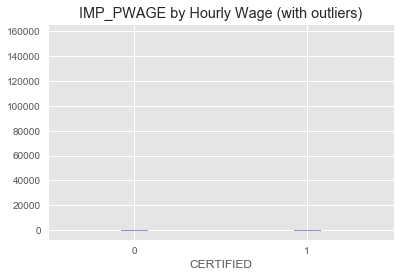

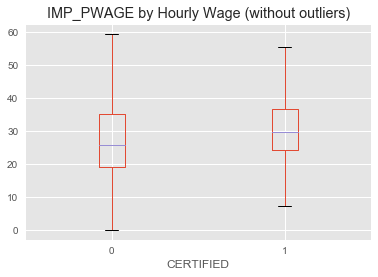

In [29]:
## Salary Boxplots

#https://stackoverflow.com/questions/22028064/matplotlib-boxplot-without-outliers
# Hourly  boxplot by Certified

Hourly_H1VisaClean_df = H1VisaClean_df[H1VisaClean_df.IMP_PW_UNIT_PAY=='Hour']

#https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python
#Hourly_H1VisaClean_df['IMP_PWAGE'] = Hourly_H1VisaClean_df['IMP_PWAGE'].str.replace(',', '')
#Hourly_H1VisaClean_df['IMP_PWAGE'] = Hourly_H1VisaClean_df['IMP_PWAGE'].astype(float)

Hourly_H1VisaClean_df.boxplot(column='IMP_PWAGE', by='CERTIFIED')
plt.title("IMP_PWAGE by Hourly Wage (with outliers)",y=1)
plt.suptitle("")
plt.figure(figsize=(8,4))

Hourly_H1VisaClean_df.boxplot(column='IMP_PWAGE', by='CERTIFIED', showfliers=False)
plt.title("IMP_PWAGE by Hourly Wage (without outliers)",y=1)
plt.suptitle("")
plt.figure(figsize=(8,4))


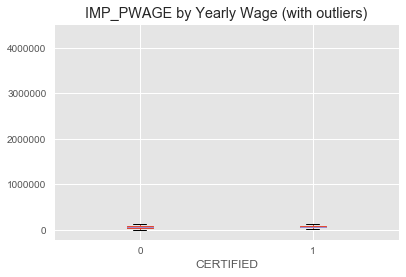

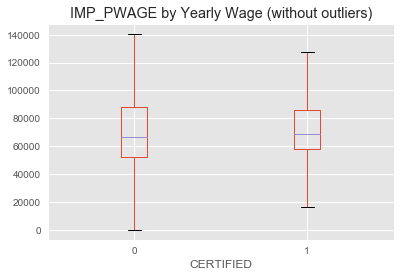

In [30]:
# Salary boxplot by Certified

Yearly_H1VisaClean_df = H1VisaClean_df[H1VisaClean_df.IMP_PW_UNIT_PAY=='Year']

#https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python
#Yearly_H1VisaClean_df['IMP_PWAGE'] = Yearly_H1VisaClean_df['IMP_PWAGE'].str.replace(',', '')
#Yearly_H1VisaClean_df['IMP_PWAGE'] = Yearly_H1VisaClean_df['IMP_PWAGE'].astype(float)

Yearly_H1VisaClean_df.boxplot(column='IMP_PWAGE', by='CERTIFIED')
plt.title("IMP_PWAGE by Yearly Wage (with outliers)",y=1)
plt.suptitle("")
plt.figure(figsize=(8,4))
plt.show()

Yearly_H1VisaClean_df.boxplot(column='IMP_PWAGE', by='CERTIFIED', showfliers=False)
plt.title("IMP_PWAGE by Yearly Wage (without outliers)",y=1)
plt.suptitle("")
plt.figure(figsize=(8,4))
plt.show()



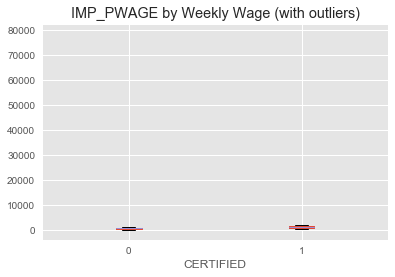

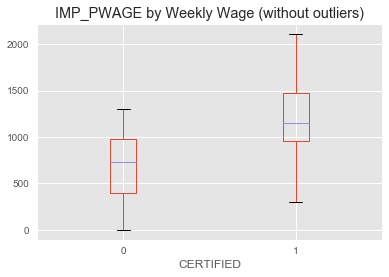

In [31]:
# Salary boxplot by Certified

Weekly_H1VisaClean_df = H1VisaClean_df[H1VisaClean_df.IMP_PW_UNIT_PAY=='Week']

#https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python
#Weekly_H1VisaClean_df['IMP_PWAGE'] = Weekly_H1VisaClean_df['IMP_PWAGE'].str.replace(',', '')
#Weekly_H1VisaClean_df['IMP_PWAGE'] = Weekly_H1VisaClean_df['IMP_PWAGE'].astype(float)


Weekly_H1VisaClean_df.boxplot(column='IMP_PWAGE', by='CERTIFIED')
plt.title("IMP_PWAGE by Weekly Wage (with outliers)",y=1)
plt.suptitle("")
plt.figure(figsize=(8,4))
plt.show()

Weekly_H1VisaClean_df.boxplot(column='IMP_PWAGE', by='CERTIFIED', showfliers=False)
plt.title("IMP_PWAGE by Weekly Wage (without outliers)",y=1)
plt.suptitle("")
plt.figure(figsize=(8,4))
plt.show()


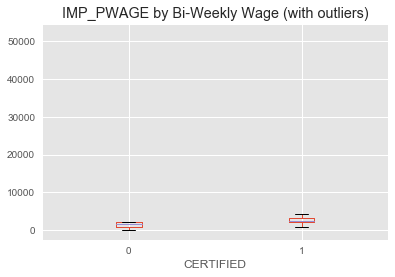

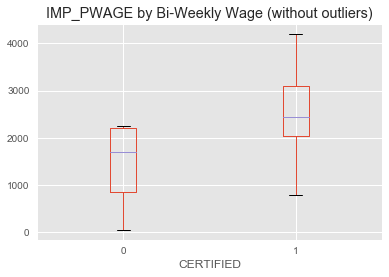

In [32]:
# Salary boxplot by Certified

BiWeekly_H1VisaClean_df = H1VisaClean_df[H1VisaClean_df.IMP_PW_UNIT_PAY=='Bi-Weekly']

#https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python
#BiWeekly_H1VisaClean_df['IMP_PWAGE'] = BiWeekly_H1VisaClean_df['IMP_PWAGE'].str.replace(',', '')
#BiWeekly_H1VisaClean_df['IMP_PWAGE'] = BiWeekly_H1VisaClean_df['IMP_PWAGE'].astype(float)


BiWeekly_H1VisaClean_df.boxplot(column='IMP_PWAGE', by='CERTIFIED')
plt.title("IMP_PWAGE by Bi-Weekly Wage (with outliers)",y=1)
plt.suptitle("")
plt.figure(figsize=(8,4))
plt.show()

BiWeekly_H1VisaClean_df.boxplot(column='IMP_PWAGE', by='CERTIFIED', showfliers=False)
plt.title("IMP_PWAGE by Bi-Weekly Wage (without outliers)",y=1)
plt.suptitle("")
plt.figure(figsize=(8,4))
plt.show()



## Explore Join Attributes

## Explore Attributes and Class

## New Features

## Exceptional Work

In [78]:
# For this part we decided to install and configure Facets https://pair-code.github.io/facets/
# we followed the instructions in https://github.com/PAIR-code/facets
# Add the facets overview python code to the python path
import sys
sys.path.append('./facets/facets_overview/python')

In [79]:
#Load Data - This is a subset of our original dataset for easy and faster load 
filename = "C:\Alma@SMU\MSDS_7331_DM\H1Visa_Project\H1_subset.csv"
H1_df = pd.read_csv(filename, encoding='cp1252')

In [87]:
# Load subset of H-1 Visa subset as train_data used by facets
import pandas as pd

features = ["CASE_NUMBER", "CASE_STATUS", "CASE_SUBMITTED","DECISION_DATE","VISA_CLASS","EMPLOYMENT_START_DATE",\
            "EMPLOYMENT_END_DATE","EMPLOYER_NAME", "EMPLOYER_ADDRESS","EMPLOYER_CITY", "EMPLOYER_STATE", "EMPLOYER_POSTAL_CODE", \
            "EMPLOYER_COUNTRY", "EMPLOYER_PHONE", "AGENT_ATTORNEY_NAME","JOB_TITLE","SOC_CODE", "SOC_NAME","NAIC_CODE", \
            "TOTAL_WORKERS","PREVAILING_WAGE", "PW_UNIT_OF_PAY","PW_WAGE_SOURCE","PW_SOURCE_YEAR","PW_SOURCE_OTHER", \
            "WAGE_RATE_OF_PAY_FROM", "WAGE_RATE_OF_PAY_TO","WAGE_UNIT_OF_PAY","H-1B_DEPENDENT","WILLFUL_VIOLATOR", \
            "WORKSITE_CITY", "WORKSITE_COUNTY", "WORKSITE_STATE", "WORKSITE_POSTAL_CODE"] 
train_data = H1_df

In [88]:
# Calculate the feature statistics proto from the datasets and stringify it for use in facets overview
from generic_feature_statistics_generator import GenericFeatureStatisticsGenerator
import base64

gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'train', 'table': train_data}])

protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

In [89]:
# Display the facets overview visualization for this data
from IPython.core.display import display, HTML

HTML_TEMPLATE = """<link rel="import" href="/nbextensions/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

Grading Rubric
• Business Understanding (10 points total).
• Describe the purpose of the data set you selected (i.e., why was this data collected in
the first place?). Describe how you would define and measure the outcomes from the
dataset. That is, why is this data important and how do you know if you have mined
useful knowledge from the dataset? How would you measure the effectiveness of a
good prediction algorithm? Be specific.
• Data Understanding (80 points total)
• [10 points] Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file.
• [15 points] Verify data quality: Explain any missing values, duplicate data, and outliers.
Are those mistakes? How do you deal with these problems? Give justifications for your
methods.
• [10 points] Visualize appropriate statistics (e.g., range, mode, mean, median, variance,
counts) for a subset of attributes. Describe anything meaningful you found from this or if
you found something potentially interesting. Note: You can also use data from other
sources for comparison. Explain why the statistics run are meaningful.
• [15 points] Visualize the most interesting attributes (at least 5 attributes, your opinion
on what is interesting). Important: Interpret the implications for each
visualization. Explain for each attribute why the chosen visualization is appropriate.


[15 points] Visualize relationships between attributes: Look at the attributes via scatter
plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain
any interesting relationships.
• [10 points] Identify and explain interesting relationships between features and the class
you are trying to predict (i.e., relationships with variables and the target classification).
• [5 points] Are there other features that could be added to the data or created from
existing features? Which ones?
• Exceptional Work (10 points total)
• You have free reign to provide additional analyses.
• One idea: implement dimensionality reduction, then visualize and interpret the results.


